In [0]:
import cv2

In [0]:
img = cv2.imread("car.jpg") #file on desktop

In [53]:
type(img)

numpy.ndarray

In [0]:
print(img)

In [0]:
from google.colab.patches import cv2_imshow

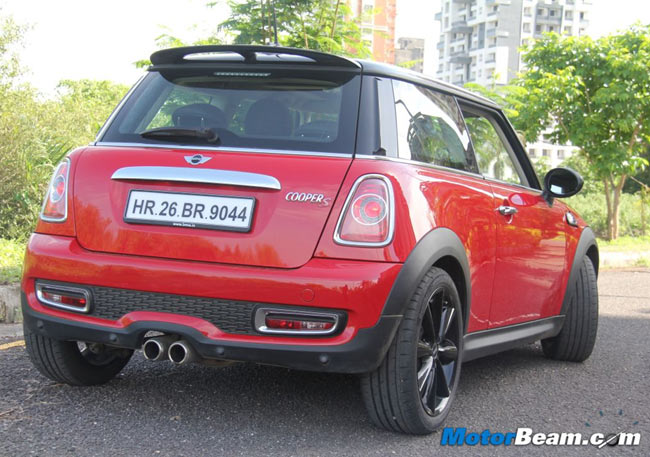

In [0]:
cv2_imshow(img)

In [0]:
img = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale

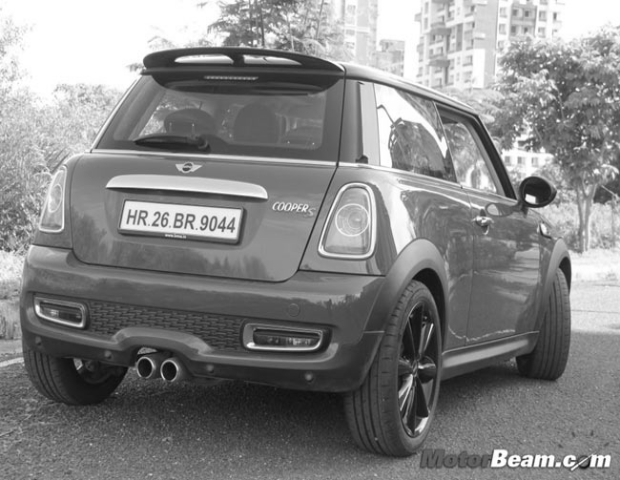

In [0]:
cv2_imshow(gray)

In [0]:
gray = cv2.bilateralFilter(gray, 50, 17, 17)

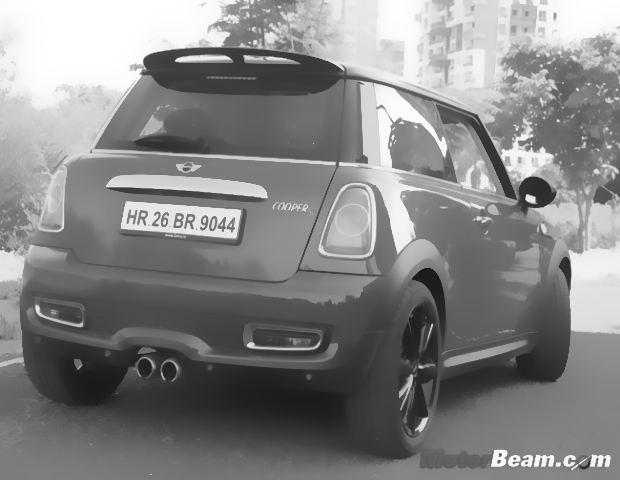

In [0]:
cv2_imshow(gray)

In [0]:
edged = cv2.Canny(gray,100,200)

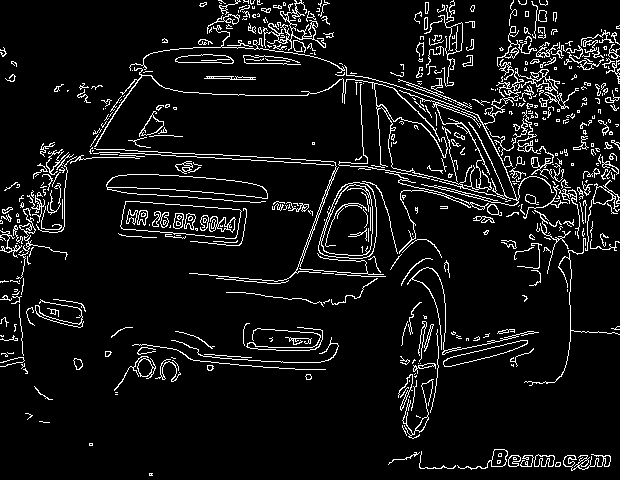

In [0]:
cv2_imshow(edged)

In [0]:
import imutils

In [0]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [60]:
print(cnts[0])

[[[353 182]]

 [[352 183]]

 [[348 183]]

 [[347 184]]

 [[345 184]]

 [[343 186]]

 [[342 186]]

 [[341 187]]

 [[341 188]]

 [[338 191]]

 [[338 192]]

 [[337 193]]

 [[337 194]]

 [[336 195]]

 [[336 197]]

 [[334 199]]

 [[334 201]]

 [[333 202]]

 [[333 203]]

 [[332 204]]

 [[332 206]]

 [[331 207]]

 [[331 208]]

 [[330 209]]

 [[330 211]]

 [[328 213]]

 [[327 212]]

 [[327 211]]

 [[327 212]]

 [[328 213]]

 [[328 216]]

 [[327 217]]

 [[327 218]]

 [[326 219]]

 [[326 221]]

 [[325 222]]

 [[325 224]]

 [[324 225]]

 [[324 227]]

 [[323 228]]

 [[323 230]]

 [[322 231]]

 [[322 233]]

 [[321 234]]

 [[321 236]]

 [[320 237]]

 [[320 240]]

 [[319 241]]

 [[319 244]]

 [[318 245]]

 [[318 250]]

 [[319 251]]

 [[319 252]]

 [[320 253]]

 [[321 253]]

 [[322 254]]

 [[323 254]]

 [[324 255]]

 [[327 255]]

 [[328 256]]

 [[335 256]]

 [[336 257]]

 [[348 257]]

 [[349 258]]

 [[362 258]]

 [[363 257]]

 [[366 257]]

 [[367 256]]

 [[369 256]]

 [[372 253]]

 [[372 252]]

 [[373

In [0]:
# loop over our contours
for c in cnts:
                # approximate the contour
                peri = cv2.arcLength(c, True)
                approx = cv2.approxPolyDP(c, 0.018 * peri, True)
                # if our approximated contour has four points, then
                # we can assume that we have found our screen
                if len(approx) == 4:
                      screenCnt = approx
                      break

In [0]:
import numpy as np

In [0]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

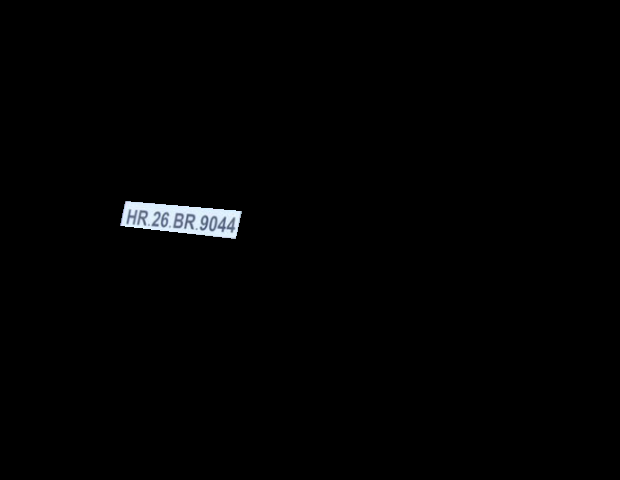

In [0]:
cv2_imshow(new_image)

In [0]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

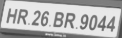

In [65]:
cv2_imshow(Cropped)

In [0]:
type(Cropped)

numpy.ndarray

In [0]:
import requests
import numpy as np

In [0]:
url_api = "https://api.ocr.space/parse/image"
import io

In [0]:
_ , compimg = cv2.imencode(".jpg",img,[1,90])
file_bytes = io.BytesIO(compimg)

In [69]:
cv2.imwrite('number_plate.jpg',Cropped)

True

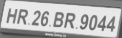

In [70]:
from IPython.display import Image
Image('number_plate.jpg')

In [71]:
result = requests.post(url_api,files={"number_plate.jpg" : file_bytes},data={"apikey":"e647b4847d88957"})
print(result)

<Response [200]>


In [0]:
import json
result = result.content.decode()
result = json.loads(result)

In [73]:
print(result)

{'ParsedResults': [{'TextOverlay': {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'}, 'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': 'HR 26 BR9044\r\nBeam.czm\r\n', 'ErrorMessage': '', 'ErrorDetails': ''}], 'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '1328', 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}


In [0]:
number = result.get('ParsedResults')[0].get('ParsedText')

In [80]:
print(number)

HR 26 BR9044
Beam.czm



In [0]:
number = number.partition('\n')[0]

In [82]:
print(number)

HR 26 BR9044


In [0]:
import requests

In [11]:
!pip install mechanicalSoup

In [0]:
import mechanicalsoup

In [86]:
br = mechanicalsoup.StatefulBrowser()
br.open("http://www.rtovehicleinformation.com/")

<Response [200]>

In [0]:
form = br.select_form('#rto_adres_form1')

In [0]:
form.set("vehicle_shrt_name",number)

In [0]:
form.choose_submit(None)

In [0]:
response = br.submit_selected()

In [91]:
response.text

'<!DOCTYPE html>\n<!-- Microdata markup added by Google Structured Data Markup Helper. -->\n<script  src="//s7.addthis.com/js/300/addthis_widget.js#pubid=ra-51ea39ef09b7ba21&amp;async=1&&amp;domready=1"></script>\n\n<script>\n\n  addthis.layers({\n\n    \'theme\' : \'gray\',\n\n    \'share\' : {\n\n      \'position\' : \'left\',\n\n      \'numPreferredServices\' : 5\n\n    }   \n\n  });\n\nif (typeof addthis_config !== "undefined") {\n\naddthis_config.services_exclude = \'print\'\n\n} else {\n\nvar addthis_config = {\n\nservices_exclude: \'print\'\n\n};\n\n}\n\n</script>\n<html lang="en-US">\n<head>\n<title>Rto Vehicle Information | Vehicle Owner Information | Registration Details</title>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, user-scalable=no">\n<link rel="shortcut icon" href="http://www.rtovehicleinformation.com/images/favicon.png">\n<meta name=\'Title\' content=\'rto vehicle information | veh

In [0]:
from bs4 import BeautifulSoup

In [0]:
soup = BeautifulSoup(response.text,'html.parser')
tr = soup.find_all('tr')

In [94]:
tr[2].find_all('td')

[<td class="trNews">Registration No.</td>, <td>HR26BR9044</td>]

In [95]:
[(tr[i].find_all('td')[0].get_text()+" : "+tr[i].find_all('td')[1].get_text())for i in range(0,5)]

['Owner Name : PAWAN',
 'Vehicle Name : TOYOTA KIRLOSKAR MOTOR PVT LTD / INNOVA',
 'Registration No. : HR26BR9044',
 'Registration Date : 07-May-2012',
 'Registration Authority : GURUGRAM NORTH, HARYANA']